# Stationary & Lags

## Stationary
Para poder modelar una serie temporal necesitamos que sea estacionaria, lo que significa que sus estadísticos no cambien con el tiempo. Estadísticos como la media, varianza y covarianza.

Veamos en un ejemplo de cómo comprobar si la serie es estacionaria y en caso contrario qué tenemos que hacer para convertirla.

Cargamos datos:

In [1]:
# ========================================
# PASO 1: IMPORTACIÓN DE LIBRERÍAS
# ========================================
# Importamos pandas para manipular datos tabulares y series temporales
import pandas as pd
# Importamos matplotlib para crear visualizaciones
import matplotlib.pyplot as plt

# ========================================
# PASO 2: CARGA DE DATOS
# ========================================
# Leemos el archivo CSV con datos históricos de acciones de Facebook
# header=0: La primera fila contiene los nombres de las columnas
# index_col=0: La primera columna (Date) será el índice del DataFrame
series = pd.read_csv('data/FB.csv', header=0, index_col=0)

# Mostramos las primeras 5 filas para verificar la carga correcta
series.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


Representamos la serie

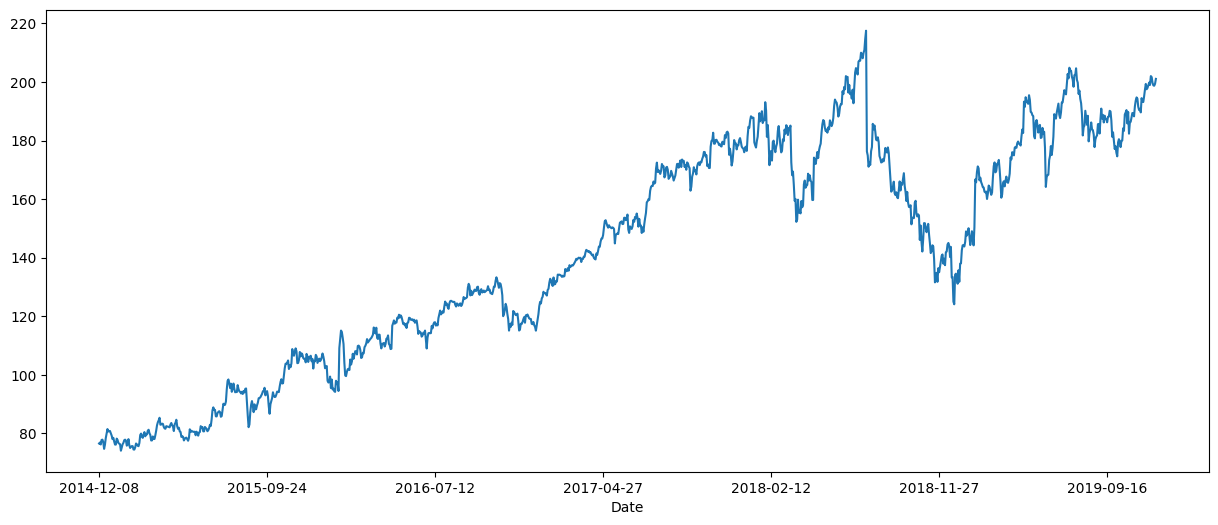

In [2]:
# ========================================
# PASO 3: VISUALIZACIÓN DE LA SERIE TEMPORAL
# ========================================
# Graficamos la columna 'Close' (precio de cierre) para observar su comportamiento
# figsize=(15,6): Definimos el tamaño de la figura (ancho, alto) en pulgadas
# El punto y coma (;) al final suprime la salida de texto del objeto matplotlib
series['Close'].plot(figsize=(15,6));

Vemos que no es estacionaria. Presenta una tendencia y no es lo mismo la varianza en cada zona de la serie temporal

Calculamos sus estadísticos

In [3]:
# ========================================
# PASO 4: CÁLCULO DE ESTADÍSTICOS DESCRIPTIVOS
# ========================================
# Calculamos estadísticas básicas de la serie temporal:
# - count: número de observaciones
# - mean: media (promedio)
# - std: desviación estándar (mide la dispersión)
# - min/max: valores mínimo y máximo
# - 25%, 50%, 75%: cuartiles (percentiles)
series['Close'].describe()

count    1259.000000
mean      141.441628
std        38.183670
min        74.050003
25%       109.729999
50%       143.679993
75%       176.259995
max       217.500000
Name: Close, dtype: float64

Ejecutamos el test de Dickey-Fuller para comprobar si la serie temporal es estacionaria.

El test de DF plantea la hipótesis nula de que la serie NO es estacionaria. Se trata de comprobar sus p-values, si quedan por encima o por debajo su alfa (0.05). Si queda por encima de su nivel de significación, aceptamos la hipótesis nula y concluimos que la serie NO es estacionaria. En caso contrario, rechazaríamos la hipótesis nula, en favor de la hipótesis alternativa, con la que concluiremos que la serie es estacionaria.

In [4]:
# ========================================
# PASO 5: TEST DE DICKEY-FULLER (ADF)
# ========================================
# Importamos la función para el test de Dickey-Fuller Aumentado
from statsmodels.tsa.stattools import adfuller

# Ejecutamos el test ADF sobre la serie 'Close'
# El test devuelve varios valores, [1] es el p-value
# INTERPRETACIÓN DEL P-VALUE:
# - Si p-value > 0.05: NO rechazamos H0 → la serie NO es estacionaria
# - Si p-value <= 0.05: Rechazamos H0 → la serie ES estacionaria
# 
# H0 (Hipótesis nula): La serie tiene una raíz unitaria (NO es estacionaria)
# H1 (Hipótesis alternativa): La serie NO tiene raíz unitaria (ES estacionaria)
adfuller(series['Close'])[1]

np.float64(0.6115683442065494)

Para solucionar esto, diferenciamos la serie. Normalmente con una diferenciación de 1 es suficiente.

In [5]:
# ========================================
# PASO 6: DIFERENCIACIÓN DE LA SERIE
# ========================================
# Creamos una copia del DataFrame original para no modificarlo
series2 = series[['Close']].copy()

# DIFERENCIACIÓN DE ORDEN 1:
# Calculamos la diferencia entre cada valor y el anterior: X(t) - X(t-1)
# diff(1): Diferencia con el valor inmediatamente anterior
# Esto ayuda a eliminar tendencias y hacer la serie estacionaria
series2['close_diff_1'] = series2['Close'].diff(1)

# DIFERENCIACIÓN DE ORDEN 2:
# Calculamos la diferencia entre cada valor y el de 2 períodos antes: X(t) - X(t-2)
# diff(2): Diferencia con el valor de hace 2 períodos
series2['close_diff_2'] = series2['Close'].diff(2)

# Mostramos las primeras filas
# NOTA: Las primeras filas tendrán NaN porque no hay valores anteriores para calcular la diferencia
series2.head()

,Close,close_diff_1,close_diff_2
Date,,,
2014-12-08,76.519997,NaN,NaN
2014-12-09,76.839996,0.319999,NaN
2014-12-10,76.180000,-0.659996,-0.339997
2014-12-11,77.730003,1.550003,0.890007
2014-12-12,77.830002,0.099999,1.650002


Representamos la diferenciación de 1

<Axes: xlabel='Date'>

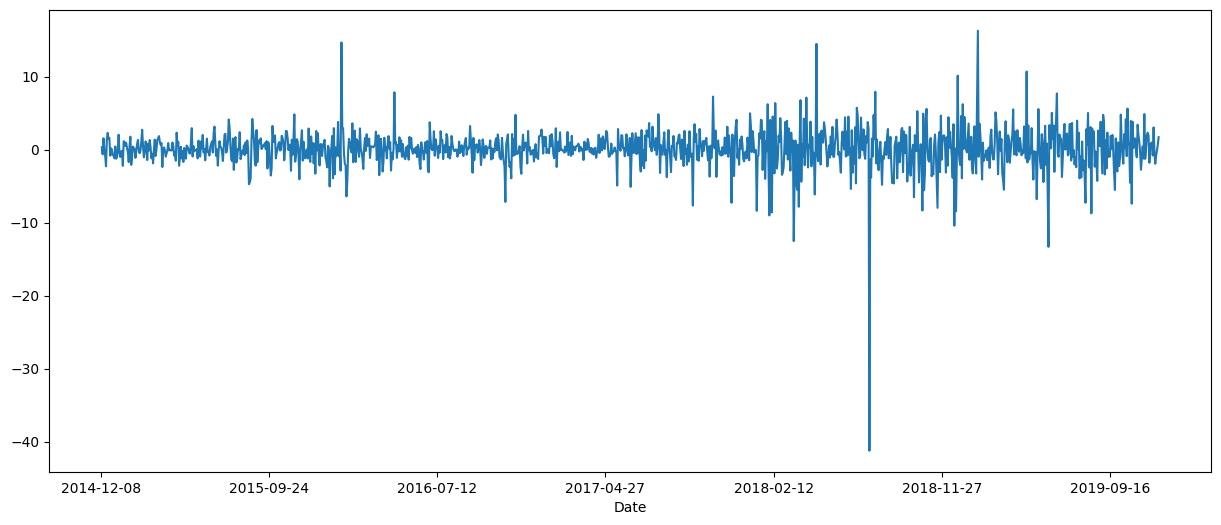

In [6]:
# ========================================
# PASO 7: VISUALIZACIÓN DE LA SERIE DIFERENCIADA
# ========================================
# Graficamos la serie con diferenciación de orden 1
# OBSERVACIÓN: La serie diferenciada debería mostrar:
# - Media más estable alrededor de cero
# - Varianza más constante a lo largo del tiempo
# - Sin tendencia aparente
series2['close_diff_1'].plot(figsize=(15,6))

Ahora calculamos sus estadísticos

In [7]:
# ========================================
# PASO 8: ESTADÍSTICOS DE LA SERIE DIFERENCIADA
# ========================================
# Calculamos estadísticas de la serie diferenciada
# COMPARACIÓN con la serie original:
# - La media debería estar cerca de 0
# - La desviación estándar debería ser menor
# - Los valores extremos (min/max) deberían ser menos pronunciados
series2['close_diff_1'].describe()

count    1258.000000
mean        0.098990
std         2.683343
min       -41.240005
25%        -0.970001
50%         0.099998
75%         1.360000
max        16.270004
Name: close_diff_1, dtype: float64

Ya que hemos diferenciado, y supuestamente ahora la serie es estacionaria, vamos a volver a probar con el test de Dickey-Fuller

In [8]:
# ========================================
# PASO 9: TEST ADF EN LA SERIE DIFERENCIADA
# ========================================
# Aplicamos nuevamente el test de Dickey-Fuller a la serie diferenciada
# dropna(): Eliminamos los valores NaN antes de aplicar el test
# 
# RESULTADO ESPERADO:
# - p-value cercano a 0 (mucho menor que 0.05)
# - Esto indica que la serie diferenciada SÍ es estacionaria
# - Confirmamos que la diferenciación fue exitosa
adfuller(series2['close_diff_1'].dropna())[1]

0.0

#### Ejemplo AVG TEM ANUAL
Ahora utilizaremos los datos 'Mean_Temp_IMD_2017.csv'

In [9]:
# ========================================
# EJEMPLO 2: TEMPERATURA MEDIA ANUAL
# ========================================
# Cargamos un nuevo dataset con temperaturas medias anuales de India (1901-2017)
# Este es otro ejemplo de serie temporal para practicar el análisis de estacionariedad
series_tmp = pd.read_csv('data/Mean_Temp_IMD_2017.csv', header=0, index_col=0)

# Visualizamos las primeras filas del dataset
series_tmp.head()

,ANNUAL_AVG_TEMPRATURE
YEAR,
1901,24.23
1902,24.33
1903,23.80
1904,23.86
1905,23.71


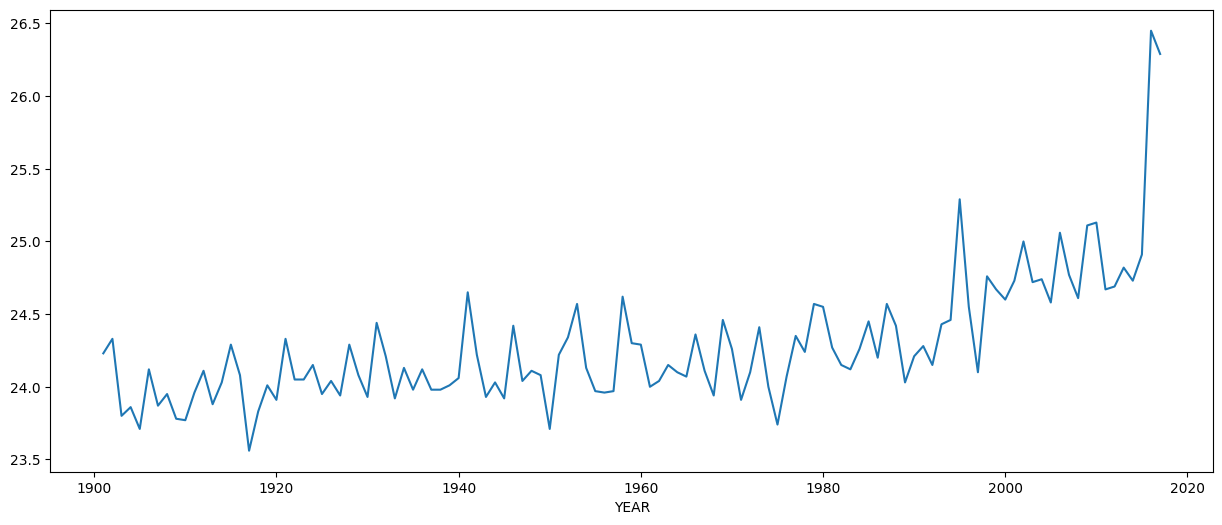

In [10]:
# ========================================
# VISUALIZACIÓN DE LA SERIE DE TEMPERATURA
# ========================================
# Graficamos la temperatura media anual a lo largo del tiempo
# OBSERVACIÓN: Buscar patrones como:
# - Tendencia ascendente o descendente
# - Estacionalidad
# - Cambios en la varianza
series_tmp['ANNUAL_AVG_TEMPRATURE'].plot(figsize=(15,6));

DF test: 0.9988
DF test diff: 0.0


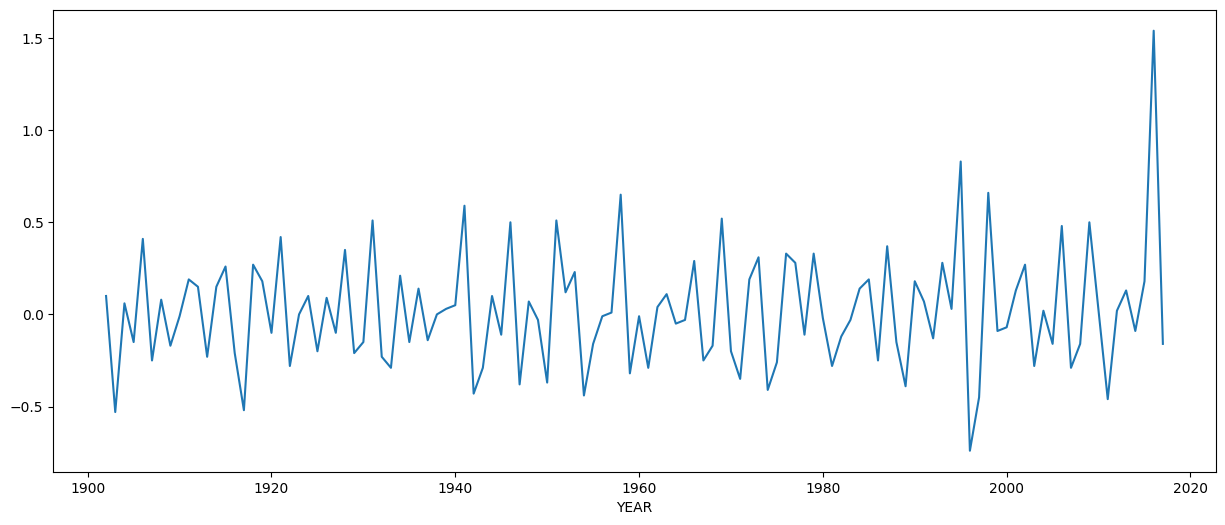

In [11]:
# ========================================
# TEST ADF Y DIFERENCIACIÓN EN TEMPERATURAS
# ========================================
# Test ADF en la serie original
# round(..., 4): Redondeamos a 4 decimales para mejor legibilidad
print("DF test:", round(adfuller(series_tmp['ANNUAL_AVG_TEMPRATURE'])[1], 4))

# Aplicamos diferenciación de orden 1 para convertir la serie en estacionaria
# .diff(): Calcula la diferencia entre valores consecutivos
# .dropna(): Elimina los valores NaN resultantes de la diferenciación
diferencio_tmp = series_tmp['ANNUAL_AVG_TEMPRATURE'].diff().dropna()

# Test ADF en la serie diferenciada
# COMPARACIÓN: El p-value debería ser mucho menor después de diferenciar
print("DF test diff:", round(adfuller(diferencio_tmp)[1], 4))

# Graficamos la serie diferenciada
diferencio_tmp.plot(figsize=(15,6));

## Lag
Un lag es un retraso en el tiempo. Se utiliza este concepto para ver la relación que tiene cada instante de un time series con instantes anteriores.

Se pueden calcular mediante shift

In [12]:
# ========================================
# CREACIÓN DE LAGS (REZAGOS)
# ========================================
# Un LAG es el valor de la variable en un momento anterior del tiempo
# Los lags son fundamentales para modelos de series temporales como ARIMA
#
# .shift(n): Desplaza los valores n posiciones hacia adelante
# - shift(1): valor del período anterior (t-1)
# - shift(2): valor de hace 2 períodos (t-2)
# - shift(3): valor de hace 3 períodos (t-3)
# - etc.

series_tmp['lag1'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(1)  # t-1
series_tmp['lag2'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(2)  # t-2
series_tmp['lag3'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(3)  # t-3
series_tmp['lag4'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(4)  # t-4
series_tmp['lag5'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(5)  # t-5

# Eliminamos las filas con NaN y mostramos el resultado
# NOTA: Los primeros 5 valores tendrán NaN en algunos lags
series_tmp.dropna().head()

,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
YEAR,,,,,,
1906,24.12,23.71,23.86,23.80,24.33,24.23
1907,23.87,24.12,23.71,23.86,23.80,24.33
1908,23.95,23.87,24.12,23.71,23.86,23.80
1909,23.78,23.95,23.87,24.12,23.71,23.86
1910,23.77,23.78,23.95,23.87,24.12,23.71


Como los algoritmos de regresión en time series dependen de instantes anteriores, hay que intentar evitar que los lags estén muy autocorrelados, por que sino sufriremos de multicolinearidad.

Vamos a comprobar cuánto de correlados están los lags

In [13]:
# ========================================
# MATRIZ DE CORRELACIÓN ENTRE LAGS
# ========================================
# Calculamos la correlación entre todas las variables (temperatura y sus lags)
# 
# IMPORTANCIA:
# - Queremos EVITAR multicolinearidad alta entre lags
# - Si los lags están muy correlacionados entre sí, causarán problemas en modelos de regresión
# - Valores cercanos a 1 o -1 indican alta correlación
# - Idealmente, los lags deberían tener correlación moderada con la variable objetivo
#   pero baja correlación entre ellos
#
# INTERPRETACIÓN:
# - Diagonal: siempre 1 (una variable consigo misma)
# - lag1 con temperatura original: mide autocorrelación de orden 1
# - lag1 con lag2: multicolinearidad entre lags consecutivos
series_tmp.corr()

,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
ANNUAL_AVG_TEMPRATURE,1.000000,0.709562,0.519207,0.559016,0.543152,0.541317
lag1,0.709562,1.000000,0.630760,0.495757,0.558646,0.529761
lag2,0.519207,0.630760,1.000000,0.636485,0.500332,0.560252
lag3,0.559016,0.495757,0.636485,1.000000,0.627644,0.484547
lag4,0.543152,0.558646,0.500332,0.627644,1.000000,0.619090
lag5,0.541317,0.529761,0.560252,0.484547,0.619090,1.000000


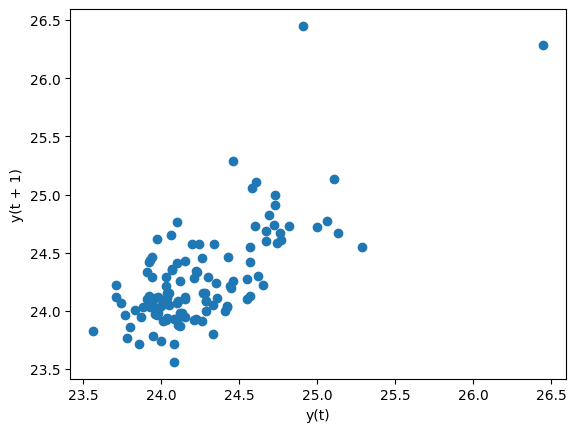

In [14]:
# ========================================
# GRÁFICO LAG PLOT
# ========================================
# lag_plot: Muestra la relación entre X(t) y X(t-1)
# Eje X: valor en el tiempo t-1
# Eje Y: valor en el tiempo t
#
# INTERPRETACIÓN:
# - Si los puntos forman una línea diagonal: alta autocorrelación
# - Si los puntos están dispersos: baja autocorrelación
# - Patrón lineal positivo: tendencia persistente
from pandas.plotting import lag_plot
lag_plot(series_tmp['ANNUAL_AVG_TEMPRATURE']);

## Autocorrelation plot
Tengo que ver cómo es la gráfica de autocorrelación, ya que si voy a utilizar una regresión lineal, no queremos que los lags estén muy correlacionados, unos con otros.

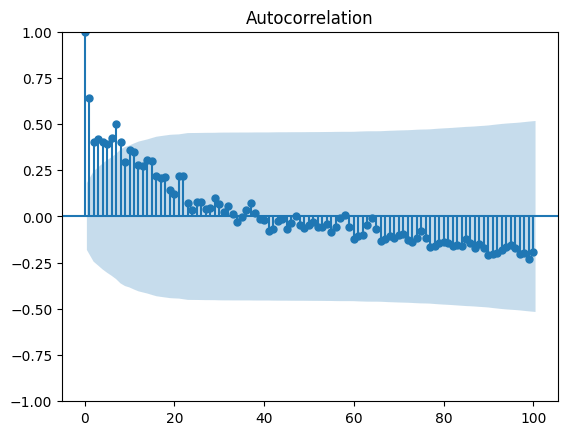

In [15]:
# ========================================
# FUNCIÓN DE AUTOCORRELACIÓN (ACF)
# ========================================
# plot_acf: Grafica la autocorrelación de la serie con diferentes lags
# lags=100: Calculamos la correlación hasta 100 períodos atrás
#
# INTERPRETACIÓN DEL GRÁFICO ACF:
# - Eje X: número de lag (rezago)
# - Eje Y: coeficiente de correlación (-1 a 1)
# - Área sombreada azul: intervalo de confianza (95%)
# - Si las barras salen del área sombreada: correlación estadísticamente significativa
# - Decaimiento lento: indica serie NO estacionaria
# - Caída rápida a 0: indica serie estacionaria
#
# PROBLEMA OBSERVADO:
# - Si vemos correlación alta en muchos lags, indica NO estacionariedad
# - Esto causa multicolinearidad en modelos de regresión
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series_tmp['ANNUAL_AVG_TEMPRATURE'], lags=100);

¿Cómo interpreto esto? Correlación muy alta entre cada dato y sus lags. Esto es debido a que la serie no es estacionaria.

Diferenciando, perdemos esa correlación entre los lags, y conseguimos una serie temporal más adecuada para entrenar nuestros modelos.

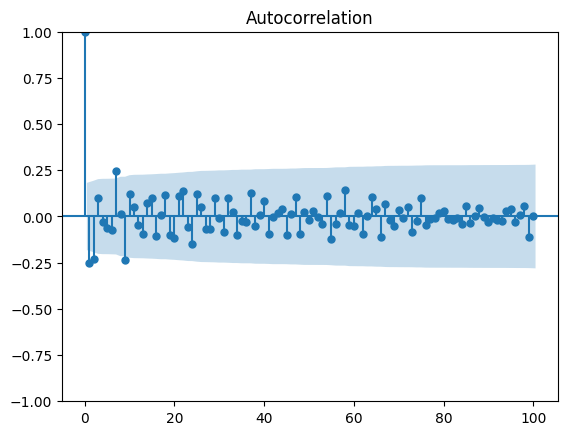

In [16]:
# ========================================
# ACF DE LA SERIE DIFERENCIADA
# ========================================
# Aplicamos diferenciación para eliminar la tendencia y reducir autocorrelación
diferencio = series_tmp['ANNUAL_AVG_TEMPRATURE'].diff().dropna()

# Graficamos el ACF de la serie diferenciada
# 
# RESULTADO ESPERADO:
# - Las barras deberían caer rápidamente dentro del área sombreada
# - Solo los primeros lags deberían mostrar correlación significativa
# - Esto indica que la serie es ahora estacionaria
# - Los lags tienen menor correlación entre sí (menos multicolinearidad)
plot_acf(diferencio, lags=100);

Probamos la autocorrelacion con los datos de bolsa y sus lags, sin diferenciar

In [17]:
# ========================================
# LAGS EN DATOS DE BOLSA (SIN DIFERENCIAR)
# ========================================
# Volvemos a los datos de Facebook para crear lags sin diferenciar primero
series2 = series[['Close']].copy()

# Creamos 5 lags de la serie original (sin diferenciar)
# Esto nos permitirá comparar la autocorrelación antes y después de diferenciar
series2['lag1'] = series2['Close'].shift(1)  # Precio de cierre del día anterior
series2['lag2'] = series2['Close'].shift(2)  # Precio de hace 2 días
series2['lag3'] = series2['Close'].shift(3)  # Precio de hace 3 días
series2['lag4'] = series2['Close'].shift(4)  # Precio de hace 4 días
series2['lag5'] = series2['Close'].shift(5)  # Precio de hace 5 días

series2.head()

,Close,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
2014-12-08,76.519997,NaN,NaN,NaN,NaN,NaN
2014-12-09,76.839996,76.519997,NaN,NaN,NaN,NaN
2014-12-10,76.180000,76.839996,76.519997,NaN,NaN,NaN
2014-12-11,77.730003,76.180000,76.839996,76.519997,NaN,NaN
2014-12-12,77.830002,77.730003,76.180000,76.839996,76.519997,NaN


In [18]:
# ========================================
# CORRELACIÓN ENTRE LAGS (DATOS DE BOLSA)
# ========================================
# Calculamos la matriz de correlación para los lags de la serie sin diferenciar
#
# OBSERVACIÓN IMPORTANTE:
# - En series NO estacionarias (como precios de acciones), esperamos ver:
#   - Correlaciones MUY altas entre todos los lags (cercanas a 1)
#   - Esto es un PROBLEMA para modelos de regresión
#   - Indica MULTICOLINEARIDAD severa
# - Por ejemplo, lag1 con lag2, lag2 con lag3, etc. estarán altamente correlacionados
series2.corr()

,Close,lag1,lag2,lag3,lag4,lag5
Close,1.000000,0.997527,0.995142,0.992821,0.990635,0.988476
lag1,0.997527,1.000000,0.997524,0.995134,0.992809,0.990617
lag2,0.995142,0.997524,1.000000,0.997519,0.995125,0.992795
lag3,0.992821,0.995134,0.997519,1.000000,0.997515,0.995116
lag4,0.990635,0.992809,0.995125,0.997515,1.000000,0.997510
lag5,0.988476,0.990617,0.992795,0.995116,0.997510,1.000000


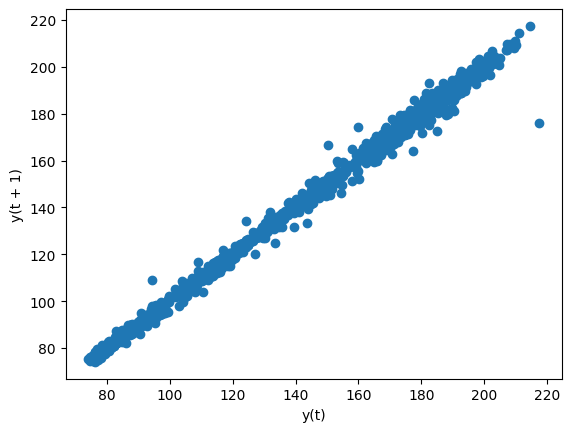

In [19]:
# ========================================
# LAG PLOT DE PRECIOS DE CIERRE
# ========================================
# Visualizamos la relación entre el precio actual y el precio del día anterior
# 
# ESPERADO EN SERIE NO ESTACIONARIA:
# - Fuerte patrón lineal positivo (casi una línea diagonal perfecta)
# - Indica que el precio de hoy está muy relacionado con el de ayer
# - Confirma alta autocorrelación en la serie original
lag_plot(series2['Close']);

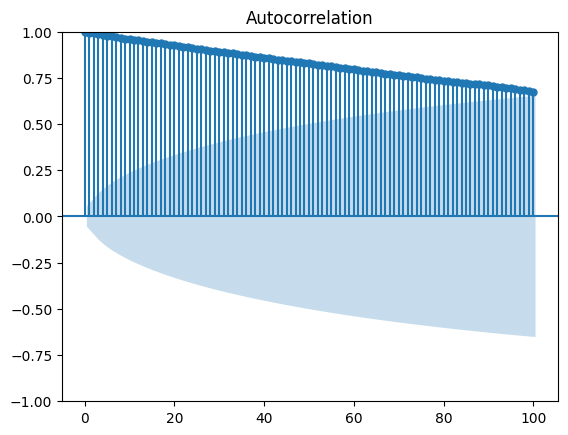

In [20]:
# ========================================
# ACF DE PRECIOS DE CIERRE (SIN DIFERENCIAR)
# ========================================
# Graficamos la función de autocorrelación de los precios sin diferenciar
#
# RESULTADO ESPERADO:
# - Todas las barras (o la mayoría) estarán fuera del intervalo de confianza
# - Decaimiento muy lento de la autocorrelación
# - Patrón característico de serie NO estacionaria
# - Indica que DEBEMOS diferenciar antes de modelar
plot_acf(series2['Close'], lags=100);

Diferenciando, me baja mucho la correlación, que es lo que estamos buscando.

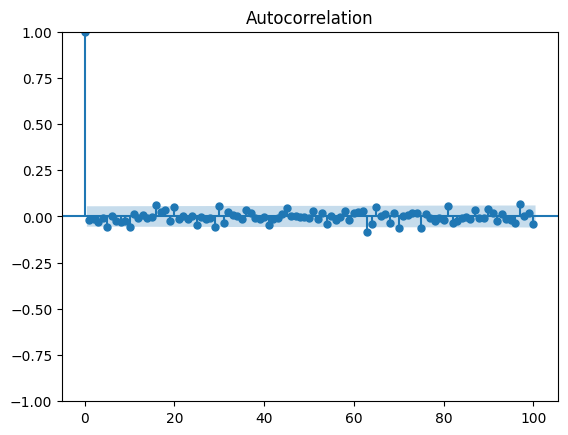

In [21]:
# ========================================
# ACF DE PRECIOS DIFERENCIADOS
# ========================================
# Diferenciamos la serie de precios de cierre
diferencio = series2['Close'].diff().dropna()

# Graficamos el ACF de los precios diferenciados
#
# RESULTADO ESPERADO:
# - Caída dramática en la autocorrelación
# - La mayoría de las barras dentro del intervalo de confianza
# - Solo los primeros 1-2 lags pueden ser significativos
# - Esto indica que la diferenciación fue EXITOSA
# - La serie ahora es ADECUADA para modelado con ARIMA o regresión
#
# CONCLUSIÓN CLAVE:
# - Diferenciación reduce multicolinearidad entre lags
# - Hace la serie estacionaria
# - Permite usar modelos de predicción de manera efectiva
plot_acf(diferencio, lags=100);